# DSC Final Project - Matt Cano

In [179]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
%matplotlib inline

In [180]:
users = pd.read_csv("Data/train_users_2.csv")
users.date_account_created = pd.to_datetime(users.date_account_created)
users.date_first_booking = pd.to_datetime(users.date_first_booking)
users.timestamp_first_active = pd.to_datetime(users.timestamp_first_active, format='%Y%m%d%H%M%S')
users.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [181]:
# u2 = users.groupby('id').count()
# u2.date_account_created.value_counts()

In [182]:
# print users.date_account_created.isnull().sum()
# users.date_account_created.value_counts()
# users.groupby([date_account_created.Month])['id'].count()

In [183]:
# # How in feature engineering I can create a diff column
# u2 = users[['id', 'date_account_created', 'timestamp_first_active']]
# u2['diff'] = u2.timestamp_first_active - u2.date_account_created
# u2.head()

In [184]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null datetime64[ns]
timestamp_first_active     213451 non-null datetime64[ns]
date_first_booking         88908 non-null datetime64[ns]
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: datetime64[ns](3), float64(1), int64(1), object(11)
memory

In [185]:
print users.shape
users.describe()

(213451, 16)


,age,signup_flow
count,125461.000000,213451.000000
mean,49.668335,3.267387
std,155.666612,7.637707
min,1.000000,0.000000
25%,28.000000,0.000000
50%,34.000000,0.000000
75%,43.000000,0.000000
max,2014.000000,25.000000


Null Values: 0
-unknown-    95688
FEMALE       63041
MALE         54440
OTHER          282
Name: gender, dtype: int64


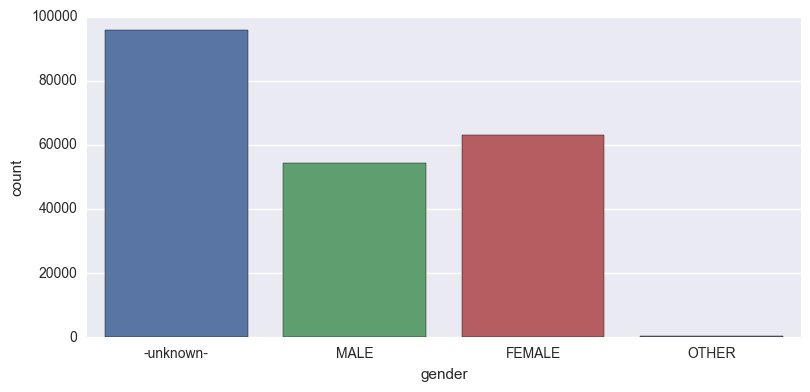

In [186]:
print "Null Values:", users.gender.isnull().sum()
print users.gender.value_counts()
sns.factorplot('gender', data=users, kind='count', aspect=2.0)

Null Values: 87990
104.0       48
108.0       15
102.0       34
112.0        1
103.0       26
132.0        1
1949.0       3
1942.0       1
1953.0       1
1928.0       2
1938.0       1
105.0     1131
107.0       23
109.0       31
150.0        1
1929.0       2
1931.0       3
2008.0       1
1932.0       3
110.0      196
101.0       23
106.0       17
1952.0       1
1936.0       2
1995.0       1
1924.0       2
2013.0      39
1925.0       1
2014.0     710
115.0       13
113.0        4
111.0        2
1947.0       2
1933.0       1
1926.0       1
1935.0       1
1927.0       1
Name: age, dtype: int64
Age > 110: 801


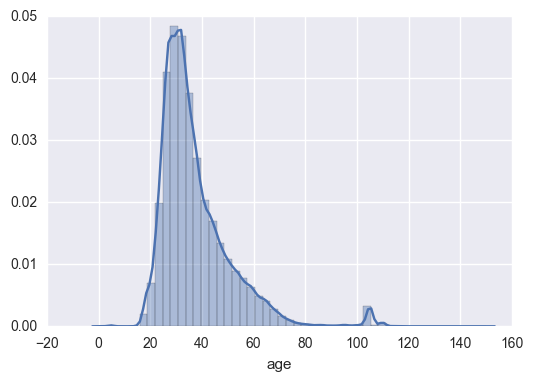

In [187]:
print "Null Values:", users.age.isnull().sum()
print users[users.age > 100].age.value_counts(sort=False)
print "Age > 110:", len(users[(users.age > 110)])
# users[(users.age > 100)].age.hist()
sns.distplot(users[(users.age < 1924)].age)
# sns.distplot(users[(users.age > 100) & (users.age < 1924)].age)
# sns.factorplot('age', data=users, kind='count', aspect=2.0)

/Users/MattCano/anaconda2/envs/bishops/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


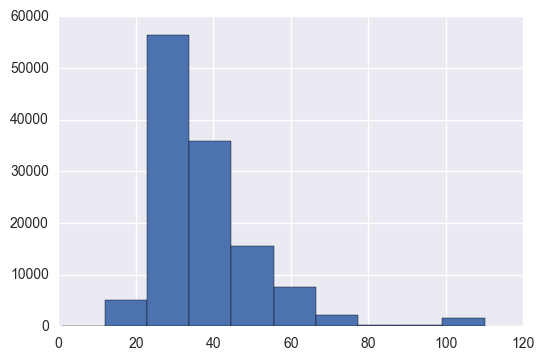

In [188]:
# Need to correct age values > 1924 (779 rows) assuming year of birth instead of age
# Changing 801 age values > 110 to Null since likely erroneous entries (known ~750 values 1924-1914, but most of those 1914)
users.age[users.age > 110] = None
users.age.hist()

Null Values: 0
basic       152897
facebook     60008
google         546
Name: signup_method, dtype: int64


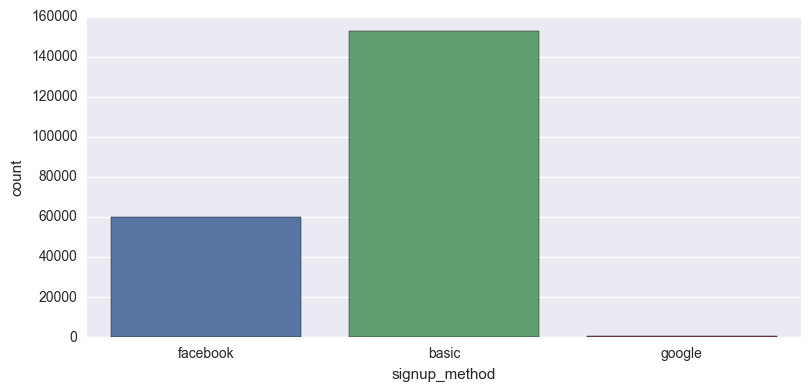

In [189]:
print "Null Values:", users.signup_method.isnull().sum()
print users.signup_method.value_counts()
sns.factorplot('signup_method', data=users, kind='count', aspect=2.0)

Null Values: 0
0     164739
1       1047
2       6881
3       8822
4          1
5         36
6        301
8        240
10         2
12      9329
15        10
16        11
20        14
21       196
23      2835
24      4328
25     14659
Name: signup_flow, dtype: int64


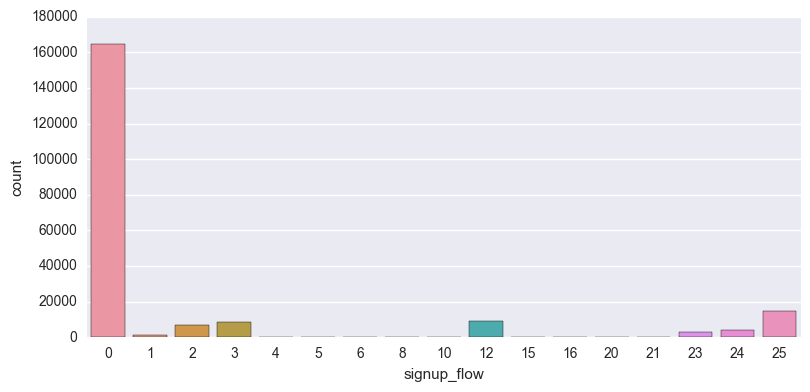

In [190]:
print "Null Values:", users.signup_flow.isnull().sum()
print users.signup_flow.value_counts(sort=False)
sns.factorplot('signup_flow', data=users, kind='count', aspect=2.0)

Null Values: 0
en    206314
zh      1632
fr      1172
es       915
ko       747
de       732
it       514
ru       389
pt       240
ja       225
sv       122
nl        97
tr        64
da        58
pl        54
cs        32
no        30
el        24
th        24
id        22
hu        18
fi        14
is         5
ca         5
hr         2
Name: language, dtype: int64


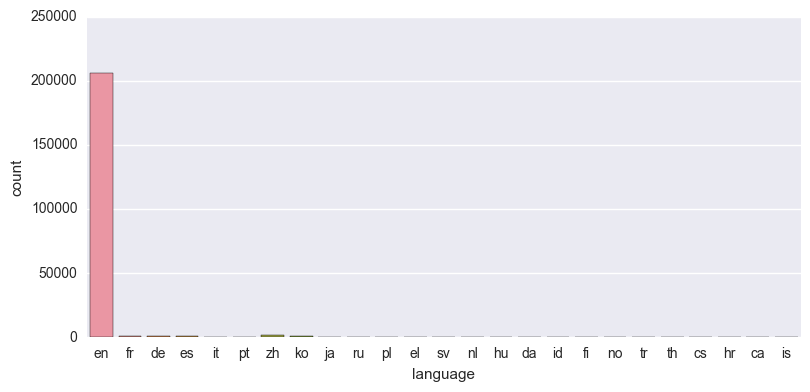

In [191]:
print "Null Values:", users.language.isnull().sum()
print users.language.value_counts(sort=True)
sns.factorplot('language', data=users, kind='count', aspect=2.0)

Null Values: 0
direct           137727
sem-brand         26045
sem-non-brand     18844
other              8961
seo                8663
api                8167
content            3948
remarketing        1096
Name: affiliate_channel, dtype: int64


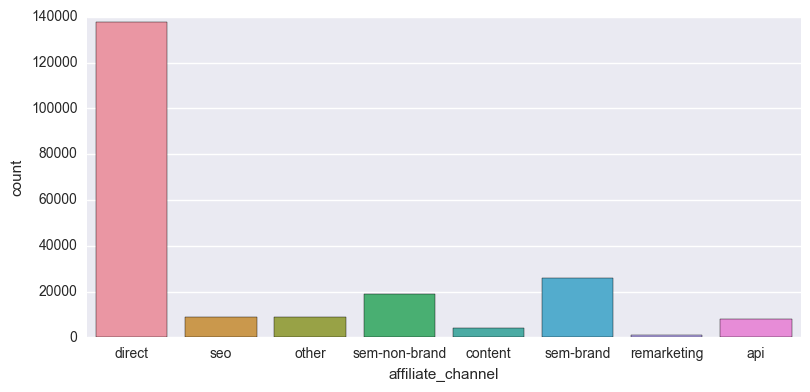

In [192]:
print "Null Values:", users.affiliate_channel.isnull().sum()
print users.affiliate_channel.value_counts(sort=True)
sns.factorplot('affiliate_channel', data=users, kind='count', aspect=2.0)

Null Values: 0
direct                 137426
google                  51693
other                   12549
craigslist               3471
bing                     2328
facebook                 2273
vast                      829
padmapper                 768
facebook-open-graph       545
yahoo                     496
gsp                       453
meetup                    347
email-marketing           166
naver                      52
baidu                      29
yandex                     17
wayn                        8
daum                        1
Name: affiliate_provider, dtype: int64


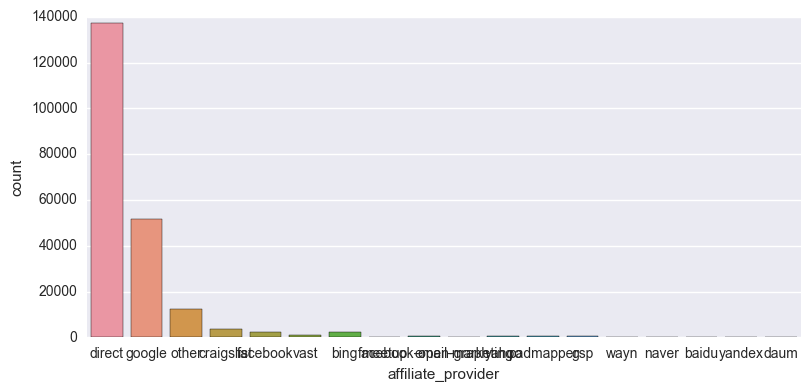

In [193]:
print "Null Values:", users.affiliate_provider.isnull().sum()
print users.affiliate_provider.value_counts(sort=True)
sns.factorplot('affiliate_provider', data=users, kind='count', aspect=2.0)

Null Values: 6065
untracked        109232
linked            46287
omg               43982
tracked-other      6156
product            1556
marketing           139
local ops            34
Name: first_affiliate_tracked, dtype: int64


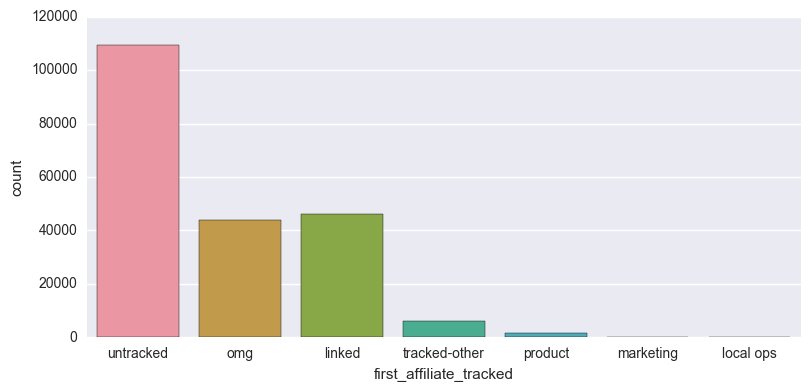

In [194]:
print "Null Values:", users.first_affiliate_tracked.isnull().sum()
print users.first_affiliate_tracked.value_counts(sort=True)
sns.factorplot('first_affiliate_tracked', data=users, kind='count', aspect=2.0)

Null Values: 0
Web        182717
iOS         19019
Moweb        6261
Android      5454
Name: signup_app, dtype: int64


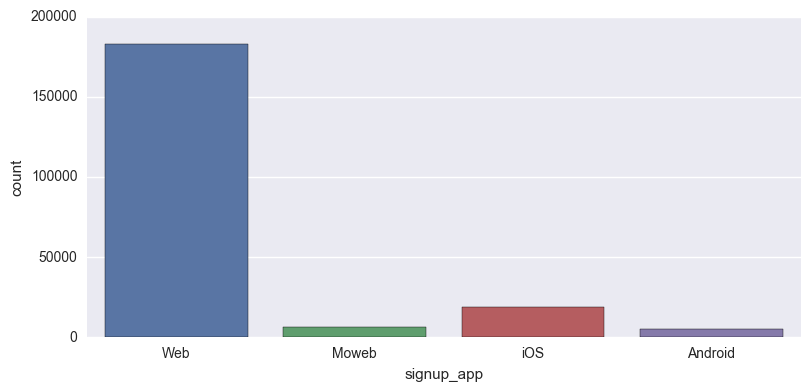

In [195]:
print "Null Values:", users.signup_app.isnull().sum()
print users.signup_app.value_counts(sort=True)
sns.factorplot('signup_app', data=users, kind='count', aspect=2.0)

Null Values: 0
Mac Desktop           89600
Windows Desktop       72716
iPhone                20759
iPad                  14339
Other/Unknown         10667
Android Phone          2803
Android Tablet         1292
Desktop (Other)        1199
SmartPhone (Other)       76
Name: first_device_type, dtype: int64


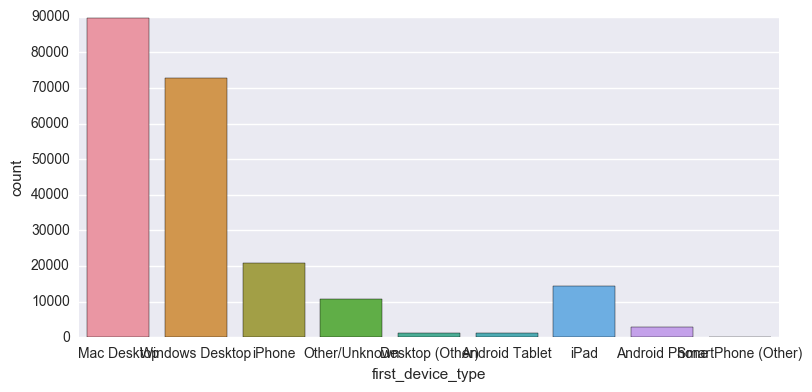

In [196]:
print "Null Values:", users.first_device_type.isnull().sum()
print users.first_device_type.value_counts(sort=True)
sns.factorplot('first_device_type', data=users, kind='count', aspect=2.0)

Null Values: 0
Chrome                  63845
Safari                  45169
Firefox                 33655
-unknown-               27266
IE                      21068
Mobile Safari           19274
Chrome Mobile            1270
Android Browser           851
AOL Explorer              245
Opera                     188
Silk                      124
Chromium                   73
BlackBerry Browser         53
Maxthon                    46
IE Mobile                  36
Apple Mail                 36
Sogou Explorer             33
Mobile Firefox             30
SiteKiosk                  24
RockMelt                   24
Iron                       17
IceWeasel                  13
Pale Moon                  12
Yandex.Browser             11
SeaMonkey                  11
CometBird                  11
Camino                      9
TenFourFox                  8
wOSBrowser                  6
CoolNovo                    6
Avant Browser               4
Opera Mini                  4
Mozilla                  

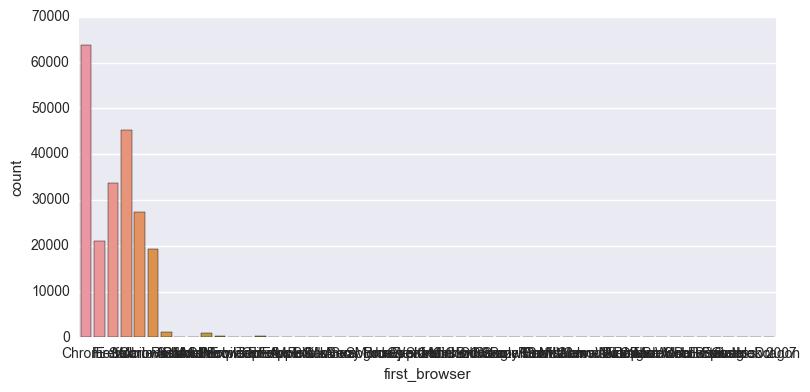

In [197]:
print "Null Values:", users.first_browser.isnull().sum()
print users.first_browser.value_counts(sort=True)
sns.factorplot('first_browser', data=users, kind='count', aspect=2.0)

Null Values: 0
NDF      124543
US        62376
other     10094
FR         5023
IT         2835
GB         2324
ES         2249
CA         1428
DE         1061
NL          762
AU          539
PT          217
Name: country_destination, dtype: int64


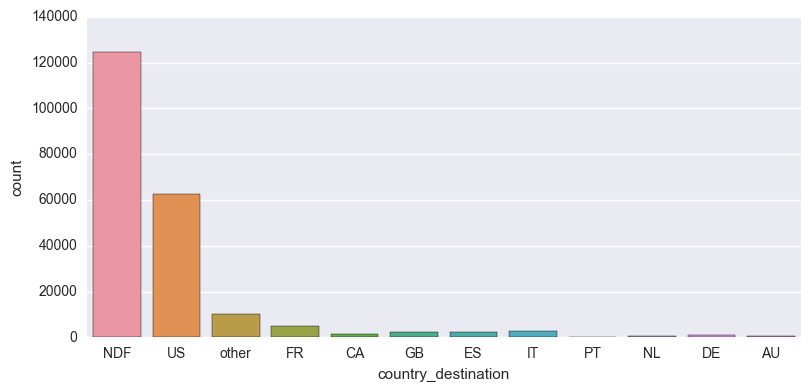

In [198]:
print "Null Values:", users.country_destination.isnull().sum()
print users.country_destination.value_counts(sort=True)
sns.factorplot('country_destination', data=users, kind='count', aspect=2.0)

In [199]:
# This is a large file (~700MB) so it takes a while to load...
# sessions = pd.read_csv("Data/sessions.csv")

In [200]:
# print sessions.shape
# sessions.head()

In [201]:
# Looking at the sessions data for one user
# sessions[sessions.user_id == 'd1mm9tcy42']

# Feature Engineering

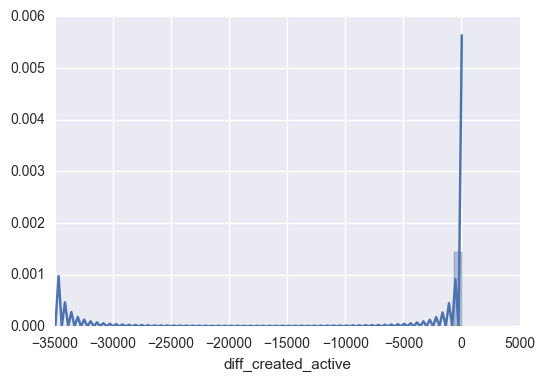

In [202]:
# Creating a new column showing # of hours between account created and first active. 
# Negative value indicated first active before creating account
users['diff_created_active'] = (users.timestamp_first_active - users.date_account_created)/np.timedelta64(1,'h')
# users.diff_created_active.value_counts(bins=10000, sort=False).head()
# users[['id', 'date_account_created', 'timestamp_first_active', 'diff_created_active']].sort_values(by='diff_created_active', ascending=False).head()
sns.distplot(users.diff_created_active)

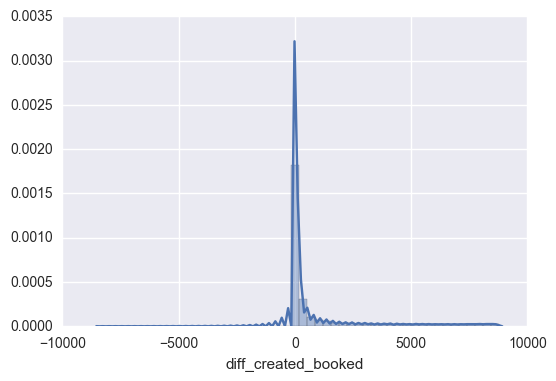

In [203]:
# Creating a new column showing # of HOURS between account created and first booking. 
# Negative value indicated first booked before creating account
    users['diff_created_booked'] = (users.date_first_booking - users.date_account_created)/np.timedelta64(1,'h')
users.diff_created_booked.value_counts(bins=10, sort=True).head()
sns.distplot(users.diff_created_booked.dropna())

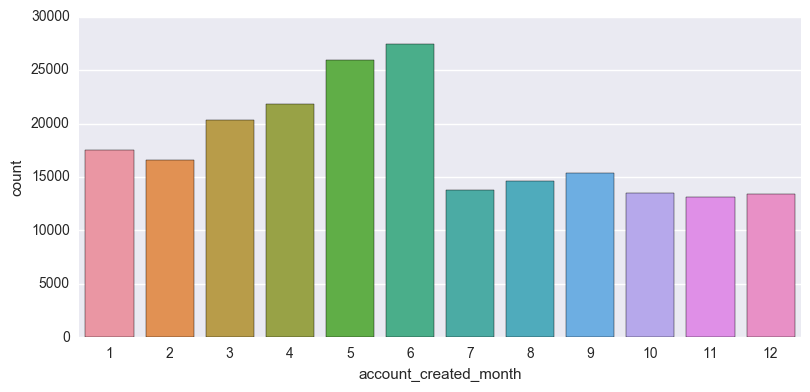

In [204]:
# Creating columns breaking out 'date_account_created' to month, season and day of week
users['account_created_month'] = users.date_account_created.map(lambda x: x.month)
# Day of week account created [0...6] = [M...Su]
users['account_created_dow'] = users.date_account_created.map(lambda x: x.dayofweek)
# Roughly season of year account created (N. Hemisphere), [1,2,3,4] = [Winter, Spring, Summer, Fall]
users['account_created_season'] = users.date_account_created.map(lambda x: (x.month-1)/3+1)
# users[['date_account_created', 'account_created_month','account_created_season','account_created_dow']].head()
sns.factorplot('account_created_month', data=users, kind='count', aspect=2.0)

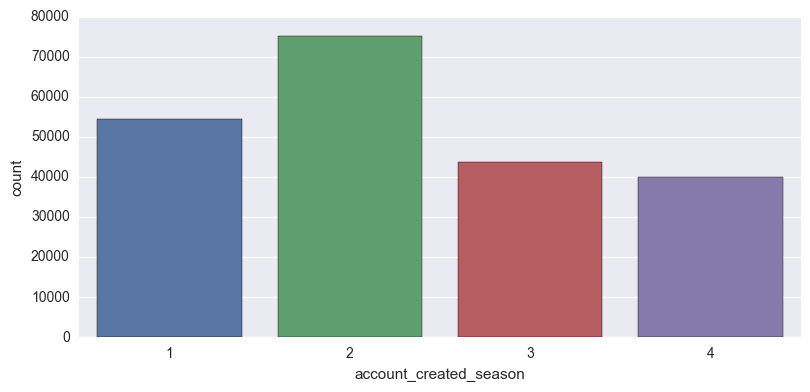

In [205]:
sns.factorplot('account_created_season', data=users, kind='count', aspect=2.0)

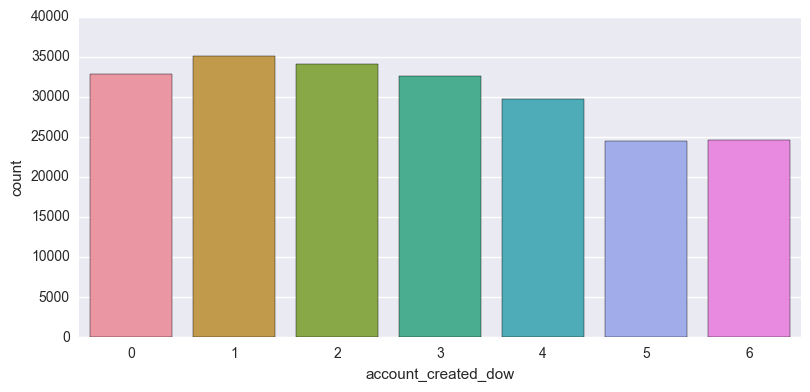

In [206]:
sns.factorplot('account_created_dow', data=users, kind='count', aspect=2.0)

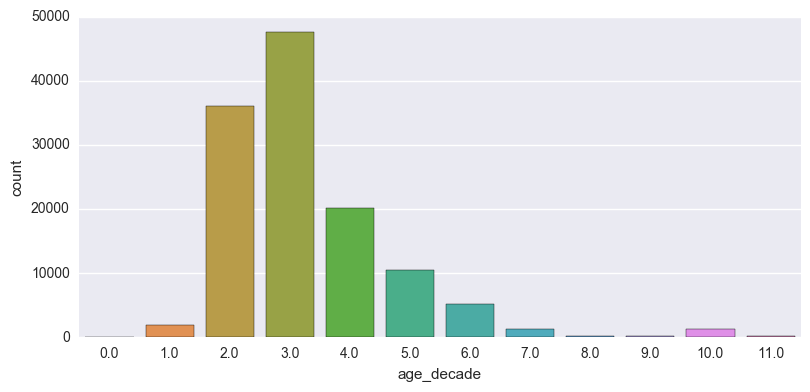

In [207]:
# Creating 'age_decade' column (e.g. 30 <= age < 40 is age_decade = 3)
users['age_decade'] = np.floor(users.age/10)
sns.factorplot('age_decade', data=users, kind='count', aspect=2.0)
# users[users.age < 10][['id','age', 'age_decade']].head()

In [208]:
dumm1 = pd.get_dummies(users.gender, prefix = 'gender')
dumm2 = pd.get_dummies(users.signup_method, prefix = 'su')
dumm3 = pd.get_dummies(users.age_decade, prefix = 'age')
dumm4 = pd.get_dummies(users.signup_app, prefix = 'app')
dumm5 = pd.get_dummies(users.first_device_type, prefix = 'dev')
dumm6 = pd.get_dummies(users.account_created_month, prefix = 'mo')
dumm7 = pd.get_dummies(users.account_created_dow, prefix = 'dow')
dumm8 = pd.get_dummies(users.account_created_season, prefix = 'season')
# This row is giving a dummy column for each browser, not just the 5 I want
dumm9 = pd.get_dummies(users.first_browser, prefix = 'browser')
users = pd.concat([users, dumm1, dumm2, dumm3, dumm4, dumm5, dumm6, dumm7, dumm8, dumm9], axis=1)
users.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,browser_SeaMonkey,browser_Silk,browser_SiteKiosk,browser_SlimBrowser,browser_Sogou Explorer,browser_Stainless,browser_TenFourFox,browser_TheWorld Browser,browser_Yandex.Browser,browser_wOSBrowser
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,-unknown-,NaN,facebook,0,en,direct,...,0,0,0,0,0,0,0,0,0,0
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,38.0,facebook,0,en,seo,...,0,0,0,0,0,0,0,0,0,0
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,...,0,0,0,0,0,0,0,0,0,0
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.0,facebook,0,en,direct,...,0,0,0,0,0,0,0,0,0,0
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,-unknown-,41.0,basic,0,en,direct,...,0,0,0,0,0,0,0,0,0,0


# Model #1: What Leads to Booking?

## Setting Up Train and Test Sets - Logistic Regression

In [76]:
users.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 292 columns):
id                              object
date_account_created            datetime64[ns]
timestamp_first_active          datetime64[ns]
date_first_booking              datetime64[ns]
gender                          object
age                             float64
signup_method                   object
signup_flow                     int64
language                        object
affiliate_channel               object
affiliate_provider              object
first_affiliate_tracked         object
signup_app                      object
first_device_type               object
first_browser                   object
country_destination             object
booked                          int64
diff_created_active             float64
diff_created_booked             float64
account_created_month           int64
account_created_dow             int64
account_created_season          int64
age_deca

In [ ]:
# users[['']]

In [112]:
from sklearn.cross_validation import train_test_split
users_m1 = users.drop(['date_first_booking'], axis=1)
users_m1 = users_m1.dropna(how="any")
X = users2.drop(['id','country_destination','age', 'age_decade', 'booked', 'date_account_created', 'timestamp_first_active', 
                'date_first_booking', 'gender', 'signup_method', 'signup_flow', 'language', 
                'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked', 
                'signup_app', 'first_device_type', 'first_browser', 'account_created_month', 
                'account_created_dow', 'account_created_season', 'diff_created_booked'], axis=1)
y = users_m1.booked
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)
X_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50843 entries, 140264 to 132803
Data columns (total 271 columns):
diff_created_active             float64
diff_created_booked             float64
gender_-unknown-                uint8
gender_FEMALE                   uint8
gender_MALE                     uint8
gender_OTHER                    uint8
su_basic                        uint8
su_facebook                     uint8
su_google                       uint8
age_0.0                         uint8
age_1.0                         uint8
age_2.0                         uint8
age_3.0                         uint8
age_4.0                         uint8
age_5.0                         uint8
age_6.0                         uint8
age_7.0                         uint8
age_8.0                         uint8
age_9.0                         uint8
age_10.0                        uint8
age_11.0                        uint8
app_Android                     uint8
app_Moweb                       uint8
app_We

In [109]:
print X.isnull().values.any()
print X.shape
print y.isnull().values.any()
print y.shape
print y.value_counts()

False
(67791, 271)
False
(67791,)
1    67791
Name: booked, dtype: int64


In [98]:
# users_clean = users[['id', 'gender', 'booked']].dropna(how='any')
# g = sns.factorplot('gender', data=users_clean, hue='booked', kind='count', aspect=2)
# g.set_xlabels('Gender')
y_train.head()

196195    1
41384     0
200194    1
200206    1
76031     1
Name: booked, dtype: int64

In [99]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()
lm.fit(X_train, y_train)
print lm.coef_
print lm.intercept

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

# Model #2: Predicting Country of Booking

In [210]:
users2 = users.dropna(how="any")
X2 = users2.drop(['id', 'country_destination','age','age_decade', 'date_account_created', 'timestamp_first_active', 
                'date_first_booking', 'gender', 'signup_method', 'signup_flow', 'language', 
                'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked', 
                'signup_app', 'first_device_type', 'first_browser', 'account_created_month', 
                'account_created_dow', 'account_created_season', 'diff_created_booked'], axis=1)
y2 = users2.country_destination
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, train_size=0.75, random_state=0)
X2_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50843 entries, 140264 to 132803
Data columns (total 108 columns):
diff_created_active             float64
gender_-unknown-                uint8
gender_FEMALE                   uint8
gender_MALE                     uint8
gender_OTHER                    uint8
su_basic                        uint8
su_facebook                     uint8
su_google                       uint8
age_0.0                         uint8
age_1.0                         uint8
age_2.0                         uint8
age_3.0                         uint8
age_4.0                         uint8
age_5.0                         uint8
age_6.0                         uint8
age_7.0                         uint8
age_8.0                         uint8
age_9.0                         uint8
age_10.0                        uint8
age_11.0                        uint8
app_Android                     uint8
app_Moweb                       uint8
app_Web                         uint8
app_iOS 

In [211]:
print X2.isnull().values.any()
print X2.shape
print y2.isnull().values.any()
print y2.shape
print y2.value_counts()

False
(67791, 108)
False
(67791,)
US       48059
other     7512
FR        3669
IT        2016
GB        1758
ES        1686
CA        1064
DE         842
NL         595
AU         433
PT         157
Name: country_destination, dtype: int64


In [212]:
y2.head()

2       US
3    other
4       US
6       US
7       US
Name: country_destination, dtype: object

In [213]:
from sklearn import datasets
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
lm2 = LogisticRegression(multi_class='ovr')
lm2.fit(X2_train, y2_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [214]:
print lm2.coef_
print lm2.intercept_

[[  2.79355077e-04  -6.43285609e-01  -3.25751120e-01 ...,  -9.61338747e-03
   -2.92251977e-03   0.00000000e+00]
 [  5.35037993e-04  -6.40911387e-01  -6.00379457e-01 ...,  -3.90383506e-02
   -1.67495383e-02   0.00000000e+00]
 [ -1.04276580e-04  -6.55076208e-01  -5.77527020e-01 ...,  -1.38405766e-02
   -1.41888713e-02   0.00000000e+00]
 ..., 
 [  9.76378178e-04  -7.37597248e-01  -8.23990053e-01 ...,  -4.08605374e-03
   -3.46658283e-03   0.00000000e+00]
 [ -3.58761557e-05   2.33097375e-01   1.65860493e-01 ...,  -3.22088163e-01
   -5.67774385e-01   0.00000000e+00]
 [  8.41869968e-05  -2.19826666e-01  -3.33690450e-01 ...,  -1.79842137e-01
    7.60685176e-01   0.00000000e+00]]
[-1.95654199 -1.52218516 -1.68408602 -1.69189962 -1.27051254 -1.6821346
 -1.35250746 -1.79546724 -2.01293361  0.49681662 -0.80645318]


In [215]:
# Make predictions
expected = y2_test
predicted = lm2.predict(X2_test)

In [216]:
# Summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

             precision    recall  f1-score   support

         AU       0.00      0.00      0.00       123
         CA       0.00      0.00      0.00       269
         DE       0.00      0.00      0.00       212
         ES       0.00      0.00      0.00       458
         FR       0.00      0.00      0.00       907
         GB       0.00      0.00      0.00       469
         IT       0.00      0.00      0.00       487
         NL       0.00      0.00      0.00       157
         PT       0.00      0.00      0.00        50
         US       0.70      1.00      0.82     11874
      other       0.00      0.00      0.00      1942

avg / total       0.49      0.70      0.58     16948

[[    0     0     0     0     0     0     0     0     0   123     0]
 [    0     0     0     0     0     0     0     0     0   269     0]
 [    0     0     0     0     0     0     0     0     0   212     0]
 [    0     0     0     0     0     0     0     0     0   458     0]
 [    0     0     0     0     0 

In [236]:
lm3 = LogisticRegression(multi_class='ovr')
# Cross-Validated Score for the Logistic Regression Model with 10 folds
scores_lm3 = cross_val_score(lm3, X2, y2, cv=10, scoring='accuracy')
print "Logistic Regression CV score: ", scores_lm3.mean()

Logistic Regression CV score:  0.708929099445


In [239]:
# No Feature Importances with Logistic Regresssions

## KNN for Model #2

In [123]:
from sklearn.neighbors import KNeighborsClassifier

In [240]:
# make an instance of a KNeighborsClassifier object
knn = KNeighborsClassifier(n_neighbors=15)
# and fit the model
knn.fit(X2_train, y2_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

In [241]:
# Make predictions
expected = y2_test
predicted_knn = knn.predict(X2_test)

In [242]:
# Summarize the fit of the model
print(metrics.classification_report(expected, predicted_knn))
print(metrics.confusion_matrix(expected, predicted_knn))

             precision    recall  f1-score   support

         AU       0.00      0.00      0.00       123
         CA       0.00      0.00      0.00       269
         DE       0.00      0.00      0.00       212
         ES       0.00      0.00      0.00       458
         FR       0.00      0.00      0.00       907
         GB       0.00      0.00      0.00       469
         IT       0.00      0.00      0.00       487
         NL       0.00      0.00      0.00       157
         PT       0.00      0.00      0.00        50
         US       0.70      1.00      0.82     11874
      other       0.20      0.00      0.01      1942

avg / total       0.51      0.70      0.58     16948

[[    0     0     0     0     0     0     0     0     0   121     2]
 [    0     0     0     0     0     0     0     0     0   268     1]
 [    0     0     0     0     0     0     0     0     0   210     2]
 [    0     0     0     0     1     0     0     0     0   456     1]
 [    0     0     0     0     0 

In [243]:
# Cross-Validated Score for the KNN (k=15 model)
scores_knn = cross_val_score(knn, X2, y2, cv=10, scoring='accuracy')
print "KNN (k=15) CV score: ", scores_knn.mean()

KNN (k=15) CV score:  0.706893459291


## KNN for Model #2 - Using Cross Validation

In [227]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
from sklearn import metrics

In [228]:
k_range = range(1,16)
k_scores = []
for k in k_range:
    knn_cv = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_cv, X2, y2, cv=3, scoring='accuracy')
    k_scores.append(scores.mean())


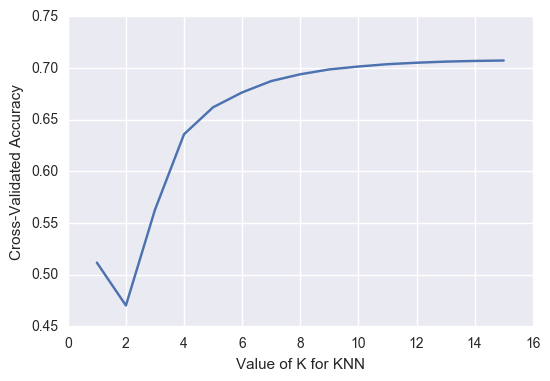

In [229]:
#Now plot the results to understand the best value of k for our model
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [221]:
# # Setup model with best k-value
# knn = KNeighborsClassifier(n_neighbors=15)
# knn.fit(X2_train, y2_train)

# # Cross-Validated Score for the KNN (k=15 model)
# scores_knn = cross_val_score(knn, X2, y2, cv=10, scoring='accuracy')
# print "KNN (k=15) CV score: ", scores_knn.mean()

# # Make predictions
# expected = y2_test
# predicted_knn = knn.predict(X2_test)

# # Summarize the fit of the model
# print(metrics.classification_report(expected, predicted_knn))

## Decision Tree for Model #2

In [222]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
scores_dt = cross_val_score(dtree, X2, y2, cv=10, scoring='accuracy')
print scores_dt.mean()

0.467435885061


In [223]:
dtree.fit(X2_train, y2_train)

# Make predictions
expected = y2_test
predicted_dtree = dtree.predict(X2_test)

# Summarize the fit of the model
print(metrics.classification_report(expected, predicted_dtree))

features = X2_train.columns
feature_importances_dtree = dtree.feature_importances_

features_df_dtree = pd.DataFrame({'Features': features, 'Importance Score': feature_importances_dtree})
features_df_dtree.sort_values('Importance Score', inplace=True, ascending=False)

features_df_dtree.head(20)

             precision    recall  f1-score   support

         AU       0.01      0.01      0.01       123
         CA       0.02      0.02      0.02       269
         DE       0.01      0.01      0.01       212
         ES       0.03      0.03      0.03       458
         FR       0.05      0.06      0.05       907
         GB       0.03      0.03      0.03       469
         IT       0.04      0.04      0.04       487
         NL       0.00      0.00      0.00       157
         PT       0.00      0.00      0.00        50
         US       0.70      0.68      0.69     11874
      other       0.12      0.12      0.12      1942

avg / total       0.51      0.49      0.50     16948



,Features,Importance Score
0,diff_created_active,0.362496
64,browser_Chrome,0.026461
11,age_3.0,0.025676
47,dow_2,0.023432
97,browser_Safari,0.022681
48,dow_3,0.022236
73,browser_Firefox,0.021759
46,dow_1,0.021462
45,dow_0,0.021377
49,dow_4,0.020848


## Random Forrest for Model #2

In [224]:
from sklearn.ensemble import RandomForestClassifier

In [233]:
# Run the Random Forrest model with different n_estimators to understand what is the optimal number
n_range = range(1,10)
n_scores = []
for n in n_range:
    rforrest_cv = RandomForestClassifier(n_estimators = n*5)
    scores = cross_val_score(rforrest_cv, X2, y2, cv=3, scoring='accuracy')
    n_scores.append(scores.mean())

In [234]:
n_range2 = []
for n in n_range:
    n_range2.append(n*5)

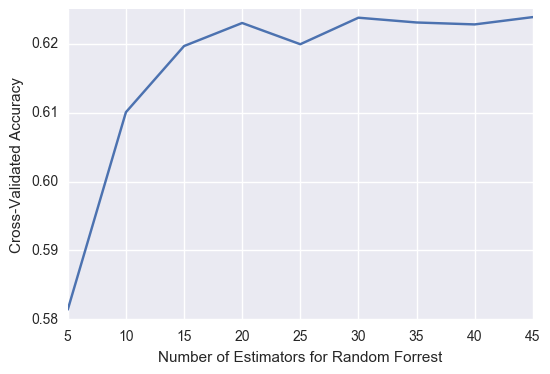

In [235]:
#Now plot the results to understand the best value of k for our model
plt.plot(n_range2, n_scores)
plt.xlabel('Number of Estimators for Random Forrest')
plt.ylabel('Cross-Validated Accuracy')

In [246]:
rforrest = RandomForestClassifier(n_estimators = 30)
scores_rf = cross_val_score(rforrest, X2, y2, cv=10, scoring='accuracy')
print scores_rf.mean()

0.600023621702


In [247]:
rforrest.fit(X2_train, y2_train)

# Make predictions
expected = y2_test
predicted_rforrest = rforrest.predict(X2_test)

# Summarize the fit of the model
print(metrics.classification_report(expected, predicted_rforrest))

features = X2_train.columns
feature_importances_rforrest = dtree.feature_importances_

features_df_rforrest = pd.DataFrame({'Features': features, 'Importance Score': feature_importances_rforrest})
features_df_rforrest.sort_values('Importance Score', inplace=True, ascending=False)

features_df_rforrest.head(20)

             precision    recall  f1-score   support

         AU       0.00      0.00      0.00       123
         CA       0.01      0.00      0.00       269
         DE       0.03      0.01      0.02       212
         ES       0.03      0.02      0.02       458
         FR       0.06      0.03      0.04       907
         GB       0.01      0.01      0.01       469
         IT       0.04      0.02      0.03       487
         NL       0.02      0.01      0.02       157
         PT       0.05      0.02      0.03        50
         US       0.70      0.85      0.77     11874
      other       0.13      0.06      0.08      1942

avg / total       0.51      0.61      0.55     16948



,Features,Importance Score
0,diff_created_active,0.362496
64,browser_Chrome,0.026461
11,age_3.0,0.025676
47,dow_2,0.023432
97,browser_Safari,0.022681
48,dow_3,0.022236
73,browser_Firefox,0.021759
46,dow_1,0.021462
45,dow_0,0.021377
49,dow_4,0.020848
